In [2]:
# Import Required Libraries
library(dplyr)
library(lubridate)
library(tsibble)
library(ggplot2)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr


Attaching package: ‘tsibble’


The following object is masked from ‘package:lubridate’:

    interval


The following objects are masked from ‘package:base’:

    intersect, setdiff, union




In [3]:
# Source Helper Functions
source("data_cleaning_helpers.R")


## Load and Inspect Calendar Data

In [4]:
# Load calendar data
calendar <- read.csv("../calendar_afcs2025.csv")

# Clean calendar data
cleaned_calendar <- cast_calendar_date(calendar)

# Display cleaned data
head(cleaned_calendar)

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX
,<date>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,2011-01-29,11101,Saturday,1,1,2011,NA,NA,NA,NA,0
2,2011-01-30,11101,Sunday,2,1,2011,NA,NA,NA,NA,0
3,2011-01-31,11101,Monday,3,1,2011,NA,NA,NA,NA,0
4,2011-02-01,11101,Tuesday,4,2,2011,NA,NA,NA,NA,1
5,2011-02-02,11101,Wednesday,5,2,2011,NA,NA,NA,NA,0
6,2011-02-03,11101,Thursday,6,2,2011,NA,NA,NA,NA,1


In [5]:
# Display unique event types

unique(cleaned_calendar$event_type_1)

[1] NA          "Sporting"  "Cultural"  "National"  "Religious"

## Load and Inspect Sell Prices Data

In [6]:
# Load sell prices data
sell_prices <- read.csv("../sell_prices_afcs2025.csv")

# Clean sell prices data
cleaned_sell_prices <- clean_sell_prices(sell_prices)

# Display cleaned data
head(cleaned_sell_prices)


,item_id,wm_yr_wk,sell_price
,<chr>,<int>,<dbl>
1,FOODS_3_001,11101,2.28
2,FOODS_3_001,11102,2.28
3,FOODS_3_001,11103,2.28
4,FOODS_3_001,11104,2.28
5,FOODS_3_001,11105,2.28
6,FOODS_3_001,11106,2.28


In [7]:
head(sell_prices)

,store_id,item_id,wm_yr_wk,sell_price
,<chr>,<chr>,<int>,<dbl>
1,TX_3,FOODS_3_001,11101,2.28
2,TX_3,FOODS_3_001,11102,2.28
3,TX_3,FOODS_3_001,11103,2.28
4,TX_3,FOODS_3_001,11104,2.28
5,TX_3,FOODS_3_001,11105,2.28
6,TX_3,FOODS_3_001,11106,2.28


In [ ]:
# Display min and max

min(cleaned_sell_prices$sell_price)
max(cleaned_sell_prices$sell_price)

[1] 0.02

[1] 19.48

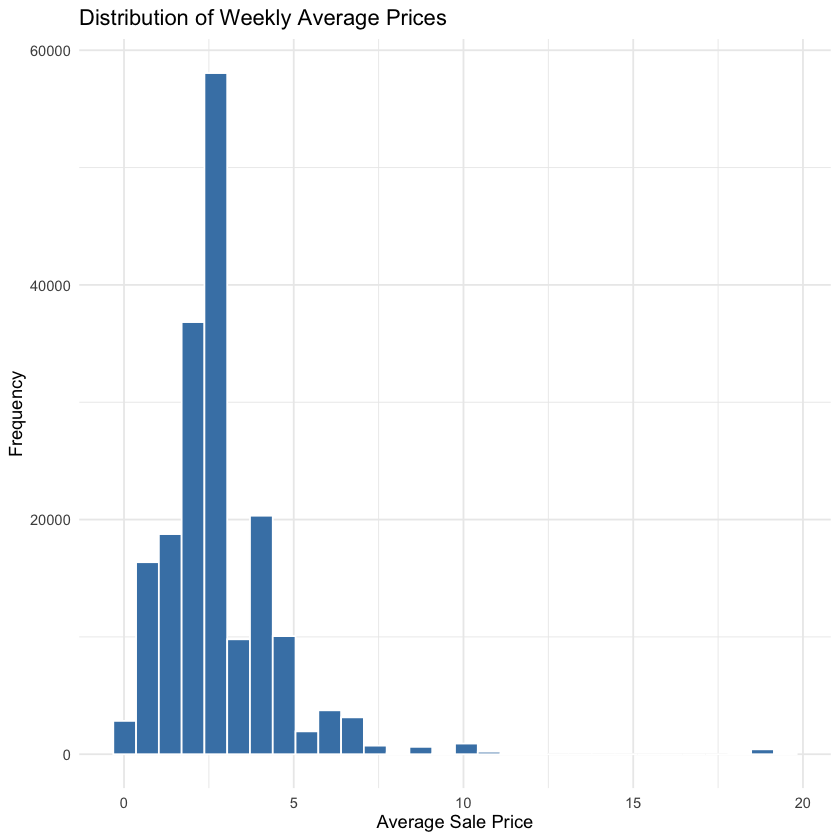

In [ ]:
# Display distribution

cleaned_sell_prices |>
    ggplot(aes(x = sell_price)) +
        geom_histogram(fill = "steelblue", color = "white", bins = 30) +
        labs(title = "Distribution of Weekly Average Prices",
            x = "Average Sale Price",
            y = "Frequency") +
        theme_minimal()

## Load and Inspect Train Data

In [57]:
# Load train data
train <- read.csv("../sales_train_validation_afcs2025.csv")

# Clean train data
cleaned_train <- clean_train_data(train)

# Display cleaned data
head(cleaned_train)


day,product,sales
<date>,<chr>,<int>
2011-01-29,FOODS_3_001,0
2011-01-29,FOODS_3_002,0
2011-01-29,FOODS_3_003,0
2011-01-29,FOODS_3_004,0
2011-01-29,FOODS_3_005,0
2011-01-29,FOODS_3_006,0


In [11]:
head(train)

,id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,⋯,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,FOODS_3_001_TX_3_validation,0,2,1,3,0,0,1,0,2,⋯,0,0,0,0,2,0,0,5,2,0
2,FOODS_3_002_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,FOODS_3_003_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,1,1,0,0,1,0,0,1,0,0
4,FOODS_3_004_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,0,0,2,0,0,0,0,0,0,0
5,FOODS_3_005_TX_3_validation,0,1,1,0,0,1,2,0,0,⋯,0,4,2,1,1,0,1,0,4,0
6,FOODS_3_006_TX_3_validation,0,0,0,0,0,0,0,0,0,⋯,0,0,2,1,0,0,1,1,1,0


In [12]:
# Display min and max

min(cleaned_train$sales, na.rm = TRUE)
max(cleaned_train$sales, na.rm = TRUE)

[1] 0

[1] 385

In [20]:
cleaned_train |>
    filter(product=="FOODS_3_002") |>
    head()

day,product,sales
<date>,<chr>,<int>
2011-01-29,FOODS_3_002,0
2011-01-30,FOODS_3_002,0
2011-01-31,FOODS_3_002,0
2011-02-01,FOODS_3_002,0
2011-02-02,FOODS_3_002,0
2011-02-03,FOODS_3_002,0


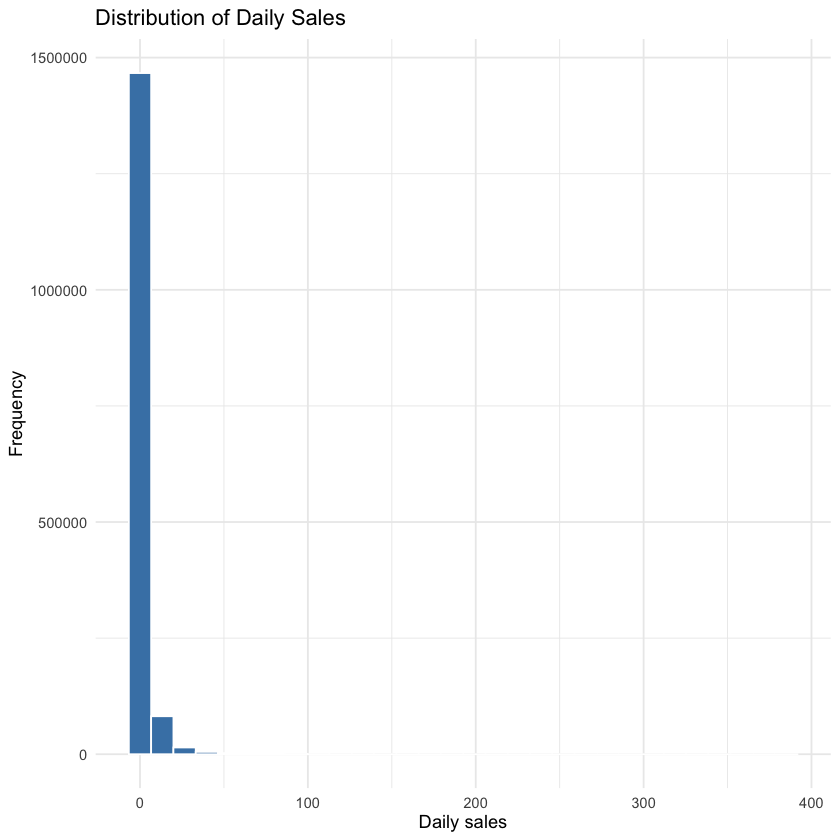

In [ ]:
# Display distribution

cleaned_train |>
    ggplot(aes(x = sales)) +
        geom_histogram(fill = "steelblue", color = "white", bins = 30) +
        labs(title = "Distribution of Daily Sales",
            x = "Daily sales",
            y = "Frequency") +
        theme_minimal()

## Analyze Data Quality

In [21]:
head(cleaned_train)

day,product,sales
<date>,<chr>,<int>
2011-01-29,FOODS_3_001,0
2011-01-29,FOODS_3_002,0
2011-01-29,FOODS_3_003,0
2011-01-29,FOODS_3_004,0
2011-01-29,FOODS_3_005,0
2011-01-29,FOODS_3_006,0


In [35]:
# Look for missing values

sum(is.na(train))
sum(is.na(sell_prices))

[1] 0

[1] 0

In [ ]:
# Look for missing days in train dataset

missing_days_train <- cleaned_train |>
    summarise(
        min_day = min(day),
        max_day = max(day),
        n_days = n_distinct(day),
        expected_days = as.integer(max_day - min_day) + 1,
        missing_days = expected_days - n_days
    )

In [ ]:
missing_days_train |>
    filter(missing_days > 0)

product,day,min_day,max_day,n_days,expected_days,missing_days
<chr>,<date>,<date>,<date>,<int>,<dbl>,<dbl>


In [39]:
missing_days |> head()

product,day,min_day,max_day,n_days,expected_days,missing_days
<chr>,<date>,<date>,<date>,<int>,<dbl>,<dbl>
FOODS_3_001,2011-01-29,2011-01-29,2011-01-29,1,1,0
FOODS_3_001,2011-01-30,2011-01-30,2011-01-30,1,1,0
FOODS_3_001,2011-01-31,2011-01-31,2011-01-31,1,1,0
FOODS_3_001,2011-02-01,2011-02-01,2011-02-01,1,1,0
FOODS_3_001,2011-02-02,2011-02-02,2011-02-02,1,1,0
FOODS_3_001,2011-02-03,2011-02-03,2011-02-03,1,1,0


In [40]:
cleaned_sell_prices |> head()

,item_id,wm_yr_wk,sell_price
,<chr>,<int>,<dbl>
1,FOODS_3_001,11101,2.28
2,FOODS_3_001,11102,2.28
3,FOODS_3_001,11103,2.28
4,FOODS_3_001,11104,2.28
5,FOODS_3_001,11105,2.28
6,FOODS_3_001,11106,2.28


In [47]:
# Look for missing weeks in price dataset

all_weeks <- cleaned_calendar |>
    distinct(wm_yr_wk)

missing_weeks_prices <- cleaned_sell_prices |>
    group_by(item_id) |>
    summarise(
        missing_weeks = nrow(
            anti_join(all_weeks,
                tibble(wm_yr_wk = wm_yr_wk),
                by = "wm_yr_wk")
            ),
        .groups = "drop"
    )

In [49]:
head(missing_weeks_prices)

item_id,missing_weeks
<chr>,<int>
FOODS_3_001,0
FOODS_3_002,142
FOODS_3_003,207
FOODS_3_004,122
FOODS_3_005,0
FOODS_3_006,158


In [ ]:
# Check if all missing weeks have 0 sales

cleaned_train_cal <- cleaned_train |>
  rename(date = day) |>
  rename(item_id = product) |>
  left_join(
    cleaned_calendar |> select(date, wm_yr_wk),
    by = "date"
  )

weekly_sales <- cleaned_train_cal |>
  index_by(wm_yr_wk) |>
  summarise(
    total_sales = sum(sales),
    .groups = "drop"
  )

weekly_prices <- cleaned_sell_prices |>
    distinct(item_id, wm_yr_wk)

weekly_check <- weekly_sales |>
  left_join(
    weekly_prices |> mutate(has_price = TRUE),
    by = c("item_id", "wm_yr_wk")
  ) |>
  mutate(
    has_price = if_else(is.na(has_price), FALSE, TRUE)
  )

In [65]:
glimpse(weekly_sales)

Rows: 225,502
Columns: 3
Key: product [823]
$ product     <chr> "FOODS_3_001", "FOODS_3_001", "FOODS_3_001", "FOODS_3_001"…
$ wm_yr_wk    <int> 11101, 11102, 11103, 11104, 11105, 11106, 11107, 11108, 11…
$ total_sales <int> 7, 8, 4, 8, 8, 4, 2, 5, 6, 3, 2, 2, 1, 4, 5, 3, 4, 5, 8, 6…


In [71]:
weekly_check |> filter(has_price == FALSE)

item_id,wm_yr_wk,total_sales,has_price
<chr>,<int>,<int>,<lgl>
FOODS_3_002,11101,0,FALSE
FOODS_3_002,11102,0,FALSE
FOODS_3_002,11103,0,FALSE
FOODS_3_002,11104,0,FALSE
FOODS_3_002,11105,0,FALSE
FOODS_3_002,11106,0,FALSE
FOODS_3_002,11107,0,FALSE
FOODS_3_002,11108,0,FALSE
FOODS_3_002,11109,0,FALSE
